In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

sns.set(font_scale=1.5)


dfall = pd.read_csv('Q3421.master.tsv', sep="\t")
dfallGB1 = pd.read_csv('GB1.master.tsv', sep="\t")


In [4]:
feature_cols_zscore=['dPW_zscore',
 'dbur_zscore',
 'dtsp_zscore',
 'dvol_zscore',
 'dkd_zscore',
 'dplopstot_zscore',
 'dRW_zscore',
 'damb_BOND_zscore',
 'damb_ANGLE_zscore',
 'damb_DIHED_zscore',
 'damb_VDWAALS_zscore',
 'damb_EEL_zscore',
 'damb_14VDWAALS_zscore',
 'damb_14EEL_zscore',
 'damb_EGB_zscore',
 'damb_ESURF_zscore',
 'damb_Gsolv_zscore',
 'damb_res_int_zscore',
 'damb_res_vdw_zscore',
 'damb_res_ele_zscore',
 'damb_res_pol_zscore',
 'damb_res_npol_zscore',
 'damb_res_tot_zscore',
 'damb_nres_int_zscore',
 'damb_nres_vdw_zscore',
 'damb_nres_ele_zscore',
 'damb_nres_pol_zscore',
 'damb_nres_npol_zscore',
 'damb_nres_tot_zscore',
 'dacc2', 'rkd']

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from scipy import stats
from sklearn.metrics import make_scorer

def pears(y_true,y_pred):
    return stats.pearsonr(y_true, y_pred)[0]
pscorer = make_scorer(pears)     


def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['ddG'])
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    shuffle = cross_validation.KFold(len(dtrain), n_folds=5, shuffle=True, random_state=1)

    
    print stats.pearsonr(dtrain_predictions, dtrain['ddG'])[0]
    print  pscorer
    #Perform cross-validation:
    if performCV:
        #cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['dG'], cv=cv_folds, scoring='neg_mean_squared_error')
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['ddG'], cv=shuffle, scoring=pscorer)
        print cv_score
    #Print model report:
    #print "\nModel Report"
    #print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['dG'].values, dtrain_predictions)
    #print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['dG'], dtrain_predprob)
    
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        
def modelfitclass(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['ddGclass'])
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    shuffle = cross_validation.KFold(len(dtrain), n_folds=5, shuffle=True, random_state=1)

    
    #print stats.pearsonr(dtrain_predictions, dtrain['ddGclass'])[0]
    #print  pscorer
    ##Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['ddGclass'], cv=cv_folds, scoring='roc_auc')
        #cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['ddG'], cv=shuffle, scoring=pscorer)
        print cv_score
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['ddGclass'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['ddGclass'], dtrain_predprob)
    
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

/lab/app/python/python_aashish/my_py/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/lab/app/python/python_aashish/my_py/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.995670588232
make_scorer(pears)
[ 0.66490454  0.64405275  0.56698677  0.58998861  0.60344523]
CV Score : Mean - 0.6138756 | Std - 0.03575628 | Min - 0.5669868 | Max - 0.6649045


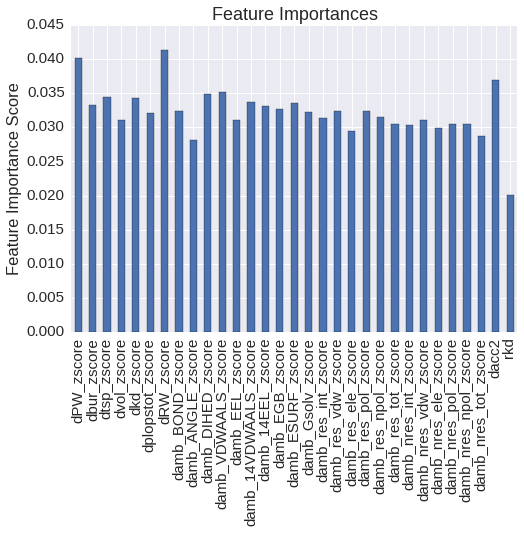

(0.70253657218770371, 2.4691761702263293e-80)


/lab/app/python/python_aashish/my_py/lib/python2.7/site-packages/matplotlib-1.4.3-py2.7-linux-x86_64.egg/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


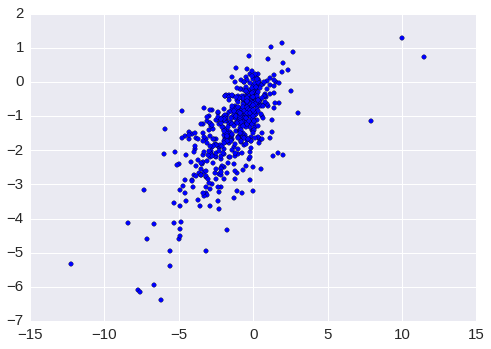

In [5]:
df=dfall[feature_cols_zscore+['ddG']]
df=df.dropna(subset=feature_cols_zscore)

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)


from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
#feature_cols = [ 'consurf', 'dpw', 'dvol', 'dkd', 'dbur', 'dtsp',  'mutexists', 'nmuts', 'bfact', 'acc', 'rw', 'neighcon']

predictors = feature_cols_zscore
gbm0 = ensemble.GradientBoostingRegressor(learning_rate=0.01, max_features=1, n_estimators=3000, min_samples_split=62, max_depth=8,subsample=0.9)
modelfit(gbm0, train, predictors)
plt.show()

X_test=test[feature_cols_zscore]
y_test=test['ddG']

plt.scatter(y_test, gbm0.predict(X_test))
print stats.pearsonr(y_test, gbm0.predict(X_test))

0.99464840221
make_scorer(pears)
[ 0.7264953   0.71214815  0.66264328  0.69135805  0.64871395]
CV Score : Mean - 0.6882717 | Std - 0.02919687 | Min - 0.6487139 | Max - 0.7264953


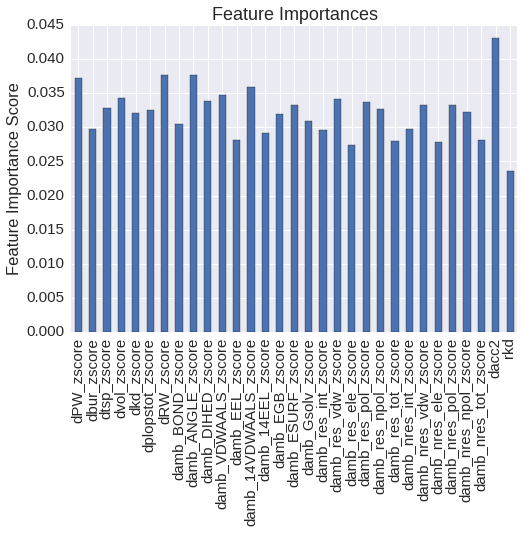

(0.59251444783084384, 9.9365399287642857e-52)


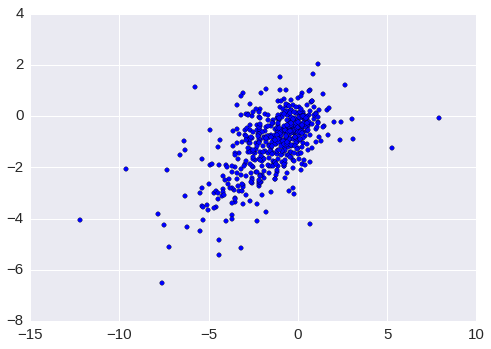

In [60]:
dfallGB1=dfallGB1.dropna(subset=feature_cols_zscore)
dfallGB1=dfallGB1[feature_cols_zscore+['ddG']]
trainGB1, testGB1 = train_test_split(dfallGB1, test_size=0.3)

train=pd.concat([train,trainGB1])

gbm1 = ensemble.GradientBoostingRegressor(learning_rate=0.01, max_features=1, n_estimators=3000, min_samples_split=62, max_depth=8,subsample=0.9)
modelfit(gbm1, train, predictors)
plt.show()

#X_test=test[feature_cols_zscore]
#y_test=test['ddG']

plt.scatter(y_test, gbm1.predict(X_test))
print stats.pearsonr(y_test, gbm1.predict(X_test))

(0.56209934708598464, 1.238271848044666e-16)


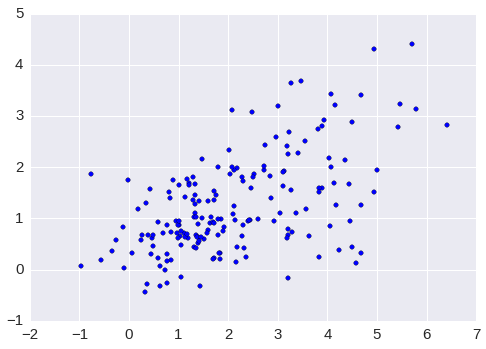

In [61]:
X_test=testGB1[feature_cols_zscore]
y_test=testGB1['ddG']

plt.scatter(y_test, -gbm0.predict(X_test))
print stats.pearsonr(y_test, -gbm0.predict(X_test))

In [82]:
#dfallGB1.ddG.hist()
dfallTPMT = pd.read_csv('TPMT-PTEN.master.tsv', sep="\t")
dfallTPMTp=dfallTPMT[feature_cols_zscore]
dfallTPMTp=dfallTPMTp.dropna(subset=feature_cols_zscore)
dfallTPMT['pred']=gbm0.predict(dfallTPMTp)
predictions=dfallTPMT[['pdbname',  'WTres_x','resnum','mutres', 'pred']]
#dfallTPMT.columns.tolist()
#dfallTPMT[dfallTPMT['pdbname']=="pten"].pred.hist()
predictions.to_csv('Predictions-TPMT-PTEN.tsv', sep="\t")

In [ ]:
#optimizing GBRT
#not functional

dfx=df
feature_cols=feature_cols_zscore
shuffle = cross_validation.KFold(len(dfx), n_folds=5, shuffle=True, random_state=0)

param_test1 = {'n_estimators':range(1000,3000,200)}
gsearch1 = GridSearchCV(estimator = ensemble.GradientBoostingRegressor(learning_rate=0.01, min_samples_split=62,max_depth=8),
            param_grid = param_test1, scoring=pscorer,n_jobs=4, cv=shuffle)
gsearch1.fit(dfx[predictors],dfx['ddGclass'])
print gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

optparams={}
for i in range(len(gsearch1.best_params_)):
    optparams[gsearch1.best_params_.items()[i][0]]=[gsearch1.best_params_.items()[i][1]]
param_test2 = dict(optparams.items() + {'max_depth':range(6,16,2), 'min_samples_split':range(22,100,20)}.items()) 
gsearch2 = GridSearchCV(estimator = ensemble.GradientBoostingRegressor(learning_rate=0.01), 
param_grid = param_test2, scoring=pscorer,n_jobs=4,iid=False, cv=shuffle)
gsearch2.fit(dfx[predictors],dfx['ddGclass'])
print gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

optparams={}
for i in range(len(gsearch2.best_params_)):
    optparams[gsearch2.best_params_.items()[i][0]]=[gsearch2.best_params_.items()[i][1]]
param_test3 = dict(optparams.items() + {'max_features':range(1,len(feature_cols),1)}.items()) 
gsearch3 = GridSearchCV(estimator = ensemble.GradientBoostingRegressor(learning_rate=0.01), 
param_grid = param_test3, scoring=pscorer,n_jobs=4,iid=False, cv=shuffle)
print gsearch3.fit(dfx[predictors],dfx['ddGclass'])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

optparams={}
for i in range(len(gsearch3.best_params_)):
    optparams[gsearch3.best_params_.items()[i][0]]=[gsearch3.best_params_.items()[i][1]]
param_test4 = dict(optparams.items() + {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9,1]}.items())
gsearch4 = GridSearchCV(estimator = ensemble.GradientBoostingRegressor(learning_rate=0.01), 
param_grid = param_test4, scoring=pscorer,n_jobs=4,iid=False, cv=shuffle)
gsearch4.fit(train[feature_cols],train['ddGclass'])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_